In [19]:
from Lab_Analyses.Spine_Analysis_v2.elimination_coactivity import elimination_coactivity_analysis

In [20]:
# Mouse ids
id_1 = "JW082"
id_2 = "JW083"
id_3 = "JW090"
id_4 = "JW092"
id_5 = "JW126"
id_6 = "JW129"
id_7 = "JW130"
id_8 = "JW153"
id_9 = "JW150"
id_10 = "JW168"

mouse_list = [id_1, id_2, id_3, id_4, id_6, id_7, id_8, id_9, id_10]
#mouse_list = [id_2, id_3, id_4, id_6]

# FOV type
fov_type = "apical"

In [ ]:
elimination_coactivity_analysis(
    mice_list=mouse_list,
    fov_type=fov_type,
    include_inactive=True
)

c:\users\jake\desktop\python_code\lab_analyses\Lab_Analyses\Spine_Analysis_v2\spine_utilities.py:149: RuntimeWarning: Mean of empty slice
  binned_data.append(np.nanmean(data[idxs]))


In [ ]:
import numpy as np
np.nanmean([np.nan, np.nan, np.nan])

In [ ]:
import numpy as np
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
x = np.random.uniform(low=-2*np.pi, high=2*np.pi, size=500)
x.sort()
y = np.sin(x) + np.random.normal(size=len(x))
z = lowess(y, x, return_sorted=False)
w = lowess(y, x, frac=0.1, return_sorted=False)
import scipy.signal as sysignal
t = sysignal.savgol_filter(y, 101, 5)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib notebook

plt.figure()
plt.plot(x, y, color="red")
plt.plot(x,z, color="blue")
plt.plot(x, w, color="green")
#plt.plot(x, t, color="blue")

In [ ]:
from Lab_Analyses.Spine_Analysis_v2 import spine_utilities as s_utils

In [ ]:
data = s_utils.load_spine_datasets("JW090", ["Early"], "apical")

In [ ]:
d = data["FOV2_apical"]["Early"]

In [ ]:
dFoF = d.spine_GluSnFr_processed_dFoF
activitya = d.spine_GluSnFr_activity

In [ ]:
plt.figure()
plt.plot(dFoF[30000:35000, 0])
plt.plot(activitya[30000:35000, 0])
print(len(np.nonzero(np.diff(activitya[:, 0]) == 1)[0]))

In [ ]:
smooth = sysignal.savgol_filter(dFoF[:, 0], 31, 2)
smooth_2 = sysignal.savgol_filter(dFoF[:, 0], 61, 6)
from Lab_Analyses.Utilities.event_detection import event_detection
activity, _, _ = event_detection(dFoF[:, 0].reshape(-1,1), 2,1,0.2, sampling_rate=60, filt_poly=6, sec_smooth=1)

In [ ]:
print(np.sum(np.diff(activity.reshape(1,-1) == 1)[0]))

In [ ]:
plt.figure()
#plt.plot(dFoF[10000:14000, 0])
plt.plot(smooth, color="black")
plt.plot(activitya[:, 0], color="blue")
#plt.plot(activity, color="red")



In [ ]:
frac = 61 / len(dFoF[:, 0])
frac

In [ ]:
smooth_l = lowess( dFoF[:, 0], np.arange(len(dFoF[:, 0])), frac=frac, return_sorted=False)

In [ ]:
print(smooth_l.shape)
print(dFoF[:, 0].shape)

np.arange(10)

In [ ]:
plt.figure()
#plt.plot(dFoF[30000:35000, 0], color="blue")
plt.plot(smooth_l[30000:35000], color="red")
plt.plot(smooth[30000:35000])

In [ ]:
import numpy as np
d = {"a": np.array([1,1,1]), "b": np.array([2,2,2])}

In [ ]:
a = np.array([1,1,1,1])
b = a.reshape(-1,1)

In [ ]:
a = np.array([[1,1,1,1,1,1],
              [2,2,2,2,2,2],
              [3,3,3,3,3,3]])

In [ ]:
np.hstack((a,a))

In [ ]:
if "F" in a and "Fnue" not in a:
    print(a)

In [ ]:
from Lab_Analyses.Utilities.save_load_pickle import load_pickle

In [ ]:
fname = r"C:\Users\Jake\Desktop\Analyzed_data\individual\JW092\imaging\FOV1_apical\Early\JW092_220606_GreenCh_imaging_data"

data = load_pickle([fname])[0]

In [ ]:
data.processed_dFoF.keys()

In [ ]:
path = r"Z:\People\Jake\Behavior\JW156\230305"
from Lab_Analyses.Behavior.load_xsg_continuous import load_xsg_continuous

In [ ]:
xsg_data = load_xsg_continuous(path)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [ ]:

frame_trace = xsg_data.channels["Frame"]
print(frame_trace)

In [ ]:
frame_times = (
        np.nonzero(
            (frame_trace[1:] > 2.5).astype(int) & (frame_trace[:-1] < 2.5).astype(int)
        )[0]
        + 1
    )
frame_times = (frame_times + 1) / 10000

In [1]:
import numpy as np

a = np.zeros(10) * np.nan

In [2]:
a = np.array([0])
b = np.array([1])
np.concatenate((a,b))

array([0, 1])

In [3]:
a=np.random.randint(10,50, size=(30))
a = np.concatenate((a, np.array([100, 130]))) / 100
b=np.random.randint(30,80, size=(30)) / 100
c=np.random.randint(5,60, size=(30)) / 100

In [4]:
x = {"a":a, "b":b, "c":c}
z = [a, b, c]

(0.4823529411764706, 0.40784313725490196, 0.9333333333333333, 1)
(1.0, 0.38823529411764707, 0.2784313725490196, 1)
(0.7529411764705882, 0.7529411764705882, 0.7529411764705882, 1)
[0.  0.2 0.4 0.6 0.8 1. ]


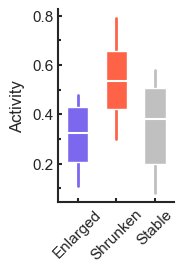

In [10]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from Lab_Analyses.Plotting.adjust_axes import adjust_axes
import pandas as pd
median_color = "white"
colors = ["mediumslateblue", "tomato", "silver"]
whisk_colors = []
for color in colors:
    whisk_colors.append(color)
    whisk_colors.append(color)

new_colors = [mcolors.to_rgba(x, alpha=1) for x in colors]
new_whisk_colors = [mcolors.to_rgba(x, alpha=1) for x in whisk_colors]


fig, ax = plt.subplots(figsize=(1.5,2.5))
bplot = ax.boxplot(z, widths=0.55, patch_artist=True, medianprops={"color": "white", "linewidth":1.5}, showcaps=False,
                  whiskerprops={"linewidth":2}, boxprops={"linewidth":1, "color":"white",}, showmeans=False, 
                   meanprops={"marker":"x", "markeredgecolor":'white', "markerfacecolor": "white"},
                  labels=["Enlarged", "Shrunken", "Stable"], flierprops={"marker": "o"}, showfliers=False)


for patch, color in zip(bplot['boxes'], new_colors):
    print(color)
    patch.set_facecolor(color)
    #patch.set_edgecolor(color)
for patch, color in zip(bplot['whiskers'], new_whisk_colors):
    patch.set_color(color)
for patch, color in zip(bplot["fliers"], new_colors):
    patch.set_markeredgecolor(color)
    patch.set_markerfacecolor("white")

    
adjust_axes(ax, minor_ticks="y", xtitle=None, ytitle="Activity", xlim=None, ylim=None, tick_len=3, axis_width=1.5)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    
    

ax.set_xmargin(0.2)

#ax.relim()
#plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
#ax.autoscale_view(tight=False)
ticks = ax.get_yticks()
print(ticks)
#ax.set_ylim(ticks[0], ticks[-1])


In [ ]:
from Lab_Analyses.Plotting.plot_box_plot import plot_box_plot

In [ ]:
plot_box_plot(x)

In [ ]:
%matplotlib notebook
fig, axes = plt.subplot_mosaic("""AB""")

plot_box_plot(x, ax=axes["A"])
plot_box_plot(x, ax=axes["B"])

In [ ]:
from itertools import compress
a = np.array([[1,1,1],
              [2,2,2]])
b = np.nanmean(a, axis=1)
np.nanmean(np.vstack((b,b,b)), axis=0)

In [ ]:
c = [True, True]
a[c,:]

In [ ]:
from Lab_Analyses.Spine_Analysis_v2 import spine_utilities as utils

In [ ]:
stable_spines = []
for flags in [data.spine_flags, data.followup_flags]:
    stable_spines.append(utils.find_stable_spines(flags))

In [ ]:
max_len = np.max([len(x) for x in stable_spines])

In [ ]:
from Lab_Analyses.Utilities.data_utilities import pad_array_to_length

In [ ]:
padded_spines = []
for i, s in enumerate(stable_spines):
    if len(s) != max_len:
        print(f"{i} is not max length")
        padded_spines.append(pad_array_to_length(s, max_len, value=False).astype(bool))
    else:
        padded_spines.append(s)

In [ ]:
a = [0,0,0,0]

np.nonzero(a)[0].shape

In [1]:
from Lab_Analyses.Spine_Analysis_v2.spine_utilities import load_spine_datasets
from Lab_Analyses.Plotting.plot_histogram import plot_histogram
import matplotlib.pyplot as plt

In [2]:
mouse_list = ["JW090", "JW092"]

In [3]:
jw090 = load_spine_datasets(mouse_list[0], ["Early"], "apical")
jw092 = load_spine_datasets(mouse_list[1], ["Early"], "apical")

In [9]:
jw090_fov2 = jw090["FOV2_apical"]["Early"]
jw090_fov3 = jw090["FOV3_apical"]["Early"]
jw092_fov1 = jw092["FOV1_apical"]["Early"]
jw092_fov2 = jw092["FOV2_apical"]["Early"]

In [10]:
jw090_fov2

Dual_Channel_Spine_Data(mouse_id='JW090', session='Early', date='220607', imaging_parameters={'Imaging Sensor': 'iGluSnFr3', 'Zoom': 9.0, 'Sampling Rate': 60.0, 'Calculate dFoF': True, 'Deconvolve': False, 'Calculate Volume': True, 'Correct Bout Separation': True, 'Ds Ratio': 20, 'Smooth Window': 0.5, 'Threshold': 2.0, 'Artifact Frames': [(1500, 1800), (18000, 18400), (48100, 48600)], 'Spine Groupings': [], 'Threshold Values': {'Dendrite': {'Upper Threshold': [0.2], 'Lower Threshold': [0.032000033510802585], 'Artifact Limit': [0.06129738000794987]}, 'Dendrite Poly': [{'Upper Threshold': [0.2223160609551791, 0.25733878112215697, 0.2717698508001157, 0.291605161823982, 0.30338812363024653, 0.29594814383819606, 0.29008413108075093, 0.2955589431909217, 0.29357281607946983, 0.2602791866611899, 0.2633130039540875, 0.25970948783967535, 0.24191422284487954, 0.23367726022882493, 0.23049025136695656, 0.2206202374678449, 0.2370165047655886, 0.2375832261835263, 0.24389945051800246, 0.23596639817981

In [11]:
jw090_fov2_dict = {
    "Sampling Rate": jw090_fov2.imaging_parameters["Sampling Rate"],
    "Lever force smooth": jw090_fov2.lever_force_smooth,
    "Lever active": jw090_fov2.lever_active,
    "Spine flags": jw090_fov2.spine_flags,
    "Spine groupings": jw090_fov2.spine_groupings,
    "Spine volume": jw090_fov2.corrected_spine_volume,
    "Spine GluSnFr dFoF": jw090_fov2.spine_GluSnFr_processed_dFoF,
    "Spine Calcium dFoF": jw090_fov2.spine_calcium_processed_dFoF,
    "Spine activity": jw090_fov2.spine_GluSnFr_activity,
    "Dendrite dFoF": jw090_fov2.dendrite_calcium_processed_dFoF,
    "Dendrite activity": jw090_fov2.dendrite_calcium_activity,
    "Followup flags": jw090_fov2.followup_flags,
    "Followup volumes": jw090_fov2.corrected_followup_volume,
}

In [12]:
jw090_fov3_dict = {
    "Sampling Rate": jw090_fov3.imaging_parameters["Sampling Rate"],
    "Lever force smooth": jw090_fov3.lever_force_smooth,
    "Lever active": jw090_fov3.lever_active,
    "Spine flags": jw090_fov3.spine_flags,
    "Spine groupings": jw090_fov3.spine_groupings,
    "Spine volume": jw090_fov3.corrected_spine_volume,
    "Spine GluSnFr dFoF": jw090_fov3.spine_GluSnFr_processed_dFoF,
    "Spine Calcium dFoF": jw090_fov3.spine_calcium_processed_dFoF,
    "Spine activity": jw090_fov3.spine_GluSnFr_activity,
    "Dendrite dFoF": jw090_fov3.dendrite_calcium_processed_dFoF,
    "Dendrite activity": jw090_fov3.dendrite_calcium_activity,
    "Followup flags": jw090_fov3.followup_flags,
    "Followup volumes": jw090_fov3.corrected_followup_volume,
}

In [13]:
jw092_fov1_dict = {
    "Sampling Rate": jw092_fov1.imaging_parameters["Sampling Rate"],
    "Lever force smooth": jw092_fov1.lever_force_smooth,
    "Lever active": jw092_fov1.lever_active,
    "Spine flags": jw092_fov1.spine_flags,
    "Spine groupings": jw092_fov1.spine_groupings,
    "Spine volume": jw092_fov1.corrected_spine_volume,
    "Spine GluSnFr dFoF": jw092_fov1.spine_GluSnFr_processed_dFoF,
    "Spine Calcium dFoF": jw092_fov1.spine_calcium_processed_dFoF,
    "Spine activity": jw092_fov1.spine_GluSnFr_activity,
    "Dendrite dFoF": jw092_fov1.dendrite_calcium_processed_dFoF,
    "Dendrite activity": jw092_fov1.dendrite_calcium_activity,
    "Followup flags": jw092_fov1.followup_flags,
    "Followup volumes": jw092_fov1.corrected_followup_volume,
}

In [15]:
jw092_fov2_dict = {
    "Sampling Rate": jw092_fov2.imaging_parameters["Sampling Rate"],
    "Lever force smooth": jw092_fov2.lever_force_smooth,
    "Lever active": jw092_fov2.lever_active,
    "Spine flags": jw092_fov2.spine_flags,
    "Spine groupings": jw092_fov2.spine_groupings,
    "Spine volume": jw092_fov2.corrected_spine_volume,
    "Spine GluSnFr dFoF": jw092_fov2.spine_GluSnFr_processed_dFoF,
    "Spine Calcium dFoF": jw092_fov2.spine_calcium_processed_dFoF,
    "Spine activity": jw092_fov2.spine_GluSnFr_activity,
    "Dendrite dFoF": jw092_fov2.dendrite_calcium_processed_dFoF,
    "Dendrite activity": jw092_fov2.dendrite_calcium_activity,
    "Followup flags": jw092_fov2.followup_flags,}
 

In [16]:
from Lab_Analyses.Utilities.save_load_pickle import save_pickle

In [17]:
path = r"C:\Users\Jake\Desktop"

In [18]:
save_pickle("JW090_FOV2", jw090_fov2_dict, path)
save_pickle("JW090_FOV3", jw090_fov3_dict, path)
save_pickle("JW092_FOV1", jw092_fov1_dict, path)
save_pickle("JW092_FOV2", jw092_fov2_dict, path)